In [15]:
import tweepy
from textblob import TextBlob #
from wordcloud import WordCloud
import pandas as pd
#import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [16]:
consumerKey = '7QT3hYtu7PcdJYQQpuVYJEQiv'
consumerSecret = '3WGhnBir9ff7eRJN11axu04cCcn1PM0ZQVtepfReU7bUysq91S'
accessToken = '1102241048959447041-m9qaek8HhOF2HoDag8AO8R3ts9CeMO'
accessTokenSecret = 'dcJdGCH1keWKtnV2qHvyg1iHvDXPQLF9OSv8uxDsvxTER'


In [17]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret) 
api = tweepy.API(authenticate, wait_on_rate_limit = True)
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")


In [18]:
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i= i+1


Show the 5 recent tweets:

1) Today is the 25th anniversary of my first book, The Road Ahead. I made a lot of predictions about technology in the book, and it was fun to look back and see what I got right (and what I got wrong). https://t.co/Kr9YUojfl9

2) This week, Rashida and I ask a big question that has never felt more urgent: is inequality inevitable? We spoke with Compton mayor @AjaLBrown and @OppInsights director Raj Chetty about what it’ll take to build a more equal society. https://t.co/7NiSAYsouy

3) RT @gavi: How can the fight to #endpolio help inform the  #COVID19 response? The @unfoundation’s Elizabeth Thrush looks at how the lessons…

4) You can listen to a bonus clip that didn’t make it into our latest episode here: https://t.co/5diXiKpEnx https://t.co/PZsCSsWx6N

5) RT @TheDailyShow: Full interview with @BillGates: https://t.co/5WtQxlfTm8



In [19]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Today is the 25th anniversary of my first book...
1,"This week, Rashida and I ask a big question th..."
2,RT @gavi: How can the fight to #endpolio help ...
3,You can listen to a bonus clip that didn’t mak...
4,RT @TheDailyShow: Full interview with @BillGat...


In [20]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) # Removing '#' hash tag
  text = re.sub('RT[\s]+', '', text) # Removing RT
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,Today is the 25th anniversary of my first book...
1,"This week, Rashida and I ask a big question th..."
2,: How can the fight to endpolio help inform th...
3,You can listen to a bonus clip that didn’t mak...
4,: Full interview with :
...,...
95,"_Nyongo: 1. This is Opal Lee, the force behind..."
96,I am committed to listening and learning more ...
97,"…in policing, criminal justice, education, hea..."
98,"The horrifying killings of George Floyd, Ahmau..."


In [21]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,Today is the 25th anniversary of my first book...,0.393810,0.067143
1,"This week, Rashida and I ask a big question th...",0.470000,0.200000
2,: How can the fight to endpolio help inform th...,0.000000,0.000000
3,You can listen to a bonus clip that didn’t mak...,0.900000,0.500000
4,: Full interview with :,0.550000,0.350000
...,...,...,...
95,"_Nyongo: 1. This is Opal Lee, the force behind...",0.700000,-0.400000
96,I am committed to listening and learning more ...,0.361667,0.166667
97,"…in policing, criminal justice, education, hea...",0.462500,-0.262500
98,"The horrifying killings of George Floyd, Ahmau...",0.680208,-0.154167


In [22]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif (score == 0):
      return 'Neutral'
  else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Today is the 25th anniversary of my first book...,0.393810,0.067143,Positive
1,"This week, Rashida and I ask a big question th...",0.470000,0.200000,Positive
2,: How can the fight to endpolio help inform th...,0.000000,0.000000,Neutral
3,You can listen to a bonus clip that didn’t mak...,0.900000,0.500000,Positive
4,: Full interview with :,0.550000,0.350000,Positive
...,...,...,...,...
95,"_Nyongo: 1. This is Opal Lee, the force behind...",0.700000,-0.400000,Negative
96,I am committed to listening and learning more ...,0.361667,0.166667,Positive
97,"…in policing, criminal justice, education, hea...",0.462500,-0.262500,Negative
98,"The horrifying killings of George Floyd, Ahmau...",0.680208,-0.154167,Negative


In [23]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity,Analysis
0,Today is the 25th anniversary of my first book...,0.393810,0.067143,Positive
1,"This week, Rashida and I ask a big question th...",0.470000,0.200000,Positive
2,: How can the fight to endpolio help inform th...,0.000000,0.000000,Neutral
3,You can listen to a bonus clip that didn’t mak...,0.900000,0.500000,Positive
4,: Full interview with :,0.550000,0.350000,Positive
...,...,...,...,...
95,"_Nyongo: 1. This is Opal Lee, the force behind...",0.700000,-0.400000,Negative
96,I am committed to listening and learning more ...,0.361667,0.166667,Positive
97,"…in policing, criminal justice, education, hea...",0.462500,-0.262500,Negative
98,"The horrifying killings of George Floyd, Ahmau...",0.680208,-0.154167,Negative


In [24]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1


Printing positive tweets:

1) Today is the 25th anniversary of my first book, The Road Ahead. I made a lot of predictions about technology in the book, and it was fun to look back and see what I got right (and what I got wrong). 

2) This week, Rashida and I ask a big question that has never felt more urgent: is inequality inevitable? We spoke with Compton mayor  and  director Raj Chetty about what it’ll take to build a more equal society. 

3) You can listen to a bonus clip that didn’t make it into our latest episode here:  

4) : Full interview with : 

5) In our first podcast episode, Rashida Jones and I talked to Dr. Anthony Fauci about what to expect in the coming months and what the world will look like after COVID-19. 

6) More than 7 million community health workers serve their neighbors around the world, improving access to primary healthcare for their communities. Now they’re doing heroic work to respond to the pandemic. 

7) : No one is safe from COVID-19 until everyone is s

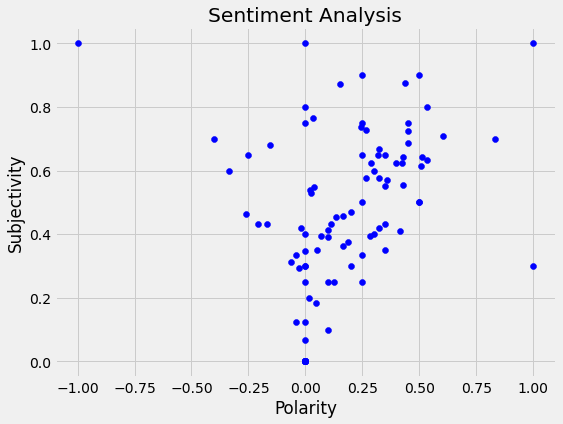

In [25]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()


In [26]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)
# Show the value counts
df['Analysis'].value_counts()


Positive    63
Neutral     24
Negative    13
Name: Analysis, dtype: int64

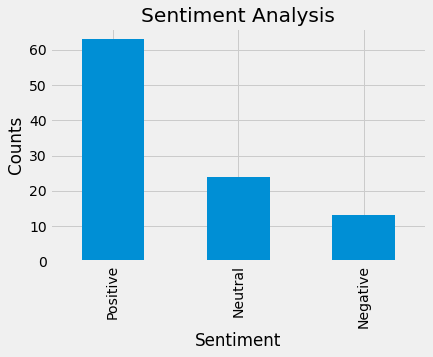

In [27]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
